Preprocessing

In [2]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

data = []
labels = []
images = []
label = 0

for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        imgResized = resize(img, (500,500))
        images.append(imgResized)
        #prep = imgResized.astype(float)
        prep = imgResized
        prep = np.ndarray.flatten(prep)
        data.append(prep)
        labels.append(label)
    label+=1

In [3]:
print(type(data[0][0]))

<class 'numpy.float64'>


In [7]:
for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        print(img[0])
        break
    break

[[254 254 252]
 [254 254 252]
 [255 255 253]
 ...
 [ 27  14   8]
 [ 28  15   9]
 [ 27  14   8]]


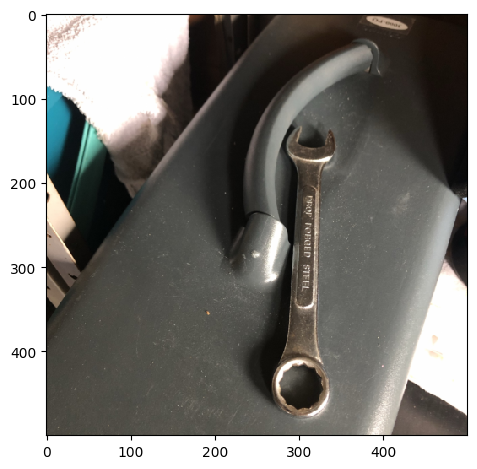

In [2]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(images[0], (500, 500))
io.imshow(down_scaled_image)
plt.show()


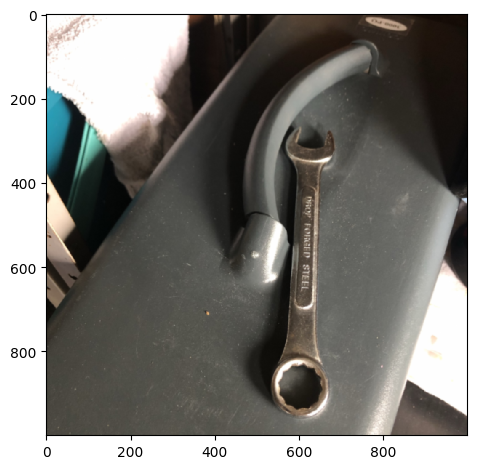

In [3]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(images[0], (1000, 1000))
io.imshow(down_scaled_image)
plt.show()
#niet zoveel verschil in kwaliteit maar wel merkbaar minder geheugen nodig (1/4)
#45% geheugen is nodig om de images in te laden
#* 8 = 280% van mijn RAM
#eens proberen met alleen rotaten? maal 4 ipv maal 8 -> 140%
#dit delen door 4 is 45%, zou moeten lukken

In [4]:
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt
from numpy import flipud

newImages = []
newLabels = []
rotations = [0, 90, 180, 270]
for i in range(len(images)):
    originalImage = images[i]
    for rotation in rotations:
        rotatedImage = rotate(originalImage, rotation)
        newImages.append(np.ndarray.flatten(rotatedImage))
        newLabels.append(labels[i])
        #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
        #newLabels.append(labels[i])

data.extend(newImages)
labels.extend(newLabels)
images = []

First we make a classifier based on the not augmented data:

In [5]:
len(data)

1015

In [6]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

trainData, testData, trainLabel, testLabel = train_test_split(data, labels, test_size=0.2, random_state=2056621)

clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(200, 200, 200, 200), random_state=2056621, max_iter=300, verbose=True)
clf.fit(trainData, trainLabel)

predLabel = clf.predict(testData)

classification_report(testLabel, predLabel)

c:\Users\robin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


'              precision    recall  f1-score   support\n\n           0       0.50      0.15      0.23        48\n           1       1.00      0.02      0.04        51\n           2       0.38      0.88      0.53        56\n           3       0.50      0.62      0.56        48\n\n    accuracy                           0.43       203\n   macro avg       0.60      0.42      0.34       203\nweighted avg       0.59      0.43      0.34       203\n'

Verslag
-beginnen met trainen normale dataset om gewoon te proberen(na alle images naar 1000, 1000 te doen)
-hidden layer size was (5,2)??
-slechte resultaten zoals verwacht (hetzelfde als random guesses)
-dan roteren + flippen toegepast -> aantal images maal 8
-paste niet meer in RAM -> disk schrijven wat het heel traag maakte
-alleen roteren past het wel in RAM + kleinere images (1000, 1000) -> (500, 500)
-hidden layer size ook naar (100, 100, 100, 100)
-dit gaf redelijke resultaten, max iterations stond nog op 50 wel + warning niet convergeren
-na dit weg te laten convergeerde het met wat betere resultaten


Volgende stappen:
